#Simple Liner Regression Model

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape           #gives rows and coloumns

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
#categorical variables in numbers
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [7]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [8]:
#Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
#Missing Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#correlation
num_cols=df.select_dtypes(include=["number"])
cor=num_cols.corr()
cor

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


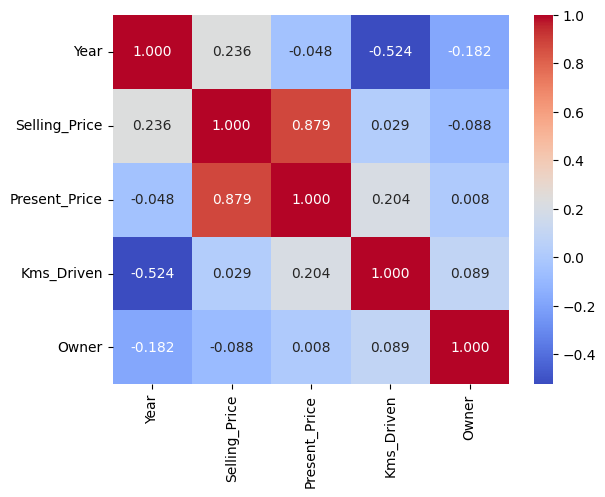

In [11]:
sns.heatmap(cor,annot=True,fmt=".3f",cmap="coolwarm")
plt.show()

In [12]:
df["Age"]=2025-df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [18]:
df.drop("Year",axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [21]:
df=pd.get_dummies(data=df,drop_first='True')
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [22]:
#Feature Selection
#X- Features- Independent variables
#Y- Target- Dependent variables
X=df.drop("Selling_Price",axis=1)
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,11,False,True,False,True
1,9.54,43000,0,12,True,False,False,True
2,9.85,6900,0,8,False,True,False,True
3,4.15,5200,0,14,False,True,False,True
4,6.87,42450,0,11,True,False,False,True


In [23]:
#Series
y=df["Selling_Price"]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
#Dataframe
y=df[["Selling_Price"]]
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
#splitting dataset-80% to train and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X Train",X_train.shape)
print("X Test",X_test.shape)
print("y Train",y_train.shape)
print("y Test",y_test.shape)

X Train (240, 8)
X Test (61, 8)
y Train (240, 1)
y Test (61, 1)


In [31]:
#Train the model using Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=lr.predict(X_test)
y_pred

array([[ 2.95534303],
       [ 8.178939  ],
       [ 6.45427257],
       [-1.42417501],
       [ 9.08889914],
       [ 7.41825441],
       [ 1.33644285],
       [ 0.84027217],
       [ 1.36501949],
       [ 7.49026806],
       [ 9.11830017],
       [ 0.58573931],
       [ 8.41612774],
       [ 3.42316502],
       [ 6.90043281],
       [ 3.04988309],
       [ 0.48448171],
       [10.70970753],
       [ 1.75207005],
       [ 2.34571752],
       [ 0.39746889],
       [ 8.11925338],
       [ 6.62469317],
       [ 2.65939066],
       [ 0.78280554],
       [ 3.69330765],
       [ 5.24815462],
       [ 2.82676351],
       [ 2.13640446],
       [ 1.75237686],
       [ 0.39730155],
       [ 9.11750503],
       [-0.66188053],
       [ 2.29098014],
       [ 8.57067341],
       [ 4.4910324 ],
       [ 7.20530369],
       [ 7.53824015],
       [ 2.89101139],
       [ 7.93588794],
       [ 3.93585154],
       [ 4.27133211],
       [ 4.33205704],
       [ 0.6008847 ],
       [ 7.34025071],
       [ 0

In [34]:
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)

Mean Absolute Error: 1.2162256821297004
Mean Squared Error: 3.4788039706378715
R2 Score: 0.848981302489908


In [36]:
#Save the model
import pickle
filename="lrmodel.sav"
pickle.dump(lr,open(filename,"wb"))